# Sentiment Analysis 

This part of project is all about using sentiment analysis to understand financial news and make decisions on stocks. We have used finviz.com to gather all article titles.

## Parsing Article Data

In [34]:
#import necessary packages

#!pip install bs4
#! pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
#! pip install matplotlib
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
#! pip install wordcloud
import pandas as pd
from collections import Counter
import re
from wordcloud import WordCloud
import yfinance as yf


In [6]:
#raw url
finviz_url = 'https://finviz.com/quote.ashx?t='

In [7]:
tickers = ['AAPL','TSLA']

In [8]:
news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response =urlopen(req)
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    

In [9]:
print(news_tables)

{'AAPL': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer news-table" id="news-table" width="100%">
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'AppleInsider', 'https://finance.yahoo.com/m/c304f6d3-1d65-3faf-97e5-38c92b5384e1/airpods%2C-ipad-updates-weren%27t.html');">
<td align="right" width="130">
            Today 10:02AM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/m/c304f6d3-1d65-3faf-97e5-38c92b5384e1/airpods%2C-ipad-updates-weren%27t.html" rel="nofollow" target="_blank">AirPods, iPad updates weren't ready in time for 2023 launches</a>
</div>
<div class="news-link-right">
<span>(AppleInsider)</span></div></div></td></tr>
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Bloomberg', 'https://finance.yahoo.com/news/big-tech-growth-status-doubt-150000813.html');">
<td align="right" width="130">
         

In [10]:
parsed_data = []
for ticker, news_table in news_tables.items():
    if news_table:
        for row in news_table.findAll('tr'):
            title = row.a.get_text(strip=True) if row.a else "N/A"
            date_data = row.td.get_text(strip=True).split(' ') if row.td else ["N/A"]

            date = ""
            time = ""

            if len(date_data) == 1:
                time = date_data[0]
            elif len(date_data) > 1:
                date = date_data[0]
                time = date_data[1]
            
            parsed_data.append([ticker, date, time, title])
    else:
        print(f"No news table found for ticker: {ticker}")


In [11]:
parsed_data

[['AAPL',
  'Today',
  '10:02AM',
  "AirPods, iPad updates weren't ready in time for 2023 launches"],
 ['AAPL',
  '',
  '10:00AM',
  'Big Techs Growth Status in Doubt With Weaker Sales Outlooks'],
 ['AAPL',
  '',
  '07:30AM',
  "'We won't be able to uninvent it': Warren Buffett says he's 'worried' about AI technology, comparing it to the atom bomb  but he's still betting big on these 3 artificial intelligence stocks"],
 ['AAPL',
  '',
  '05:53AM',
  "Wall Street Is Hating on Apple Right Now. Here Are 5 Reasons I'm Not."],
 ['AAPL',
  '',
  '02:58AM',
  'UPDATE 1-Foxconn sticks to strong end-of-year sales outlook'],
 ['AAPL', '', '12:01AM', 'N/A'],
 ['AAPL',
  '',
  '12:01AM',
  'Big Western Brands Are Getting Squeezed by Chinese Belt-Tightening'],
 ['AAPL',
  'Nov-04-23',
  '06:58PM',
  'Analysts offer hot takes on Q4 2023 Apple results'],
 ['AAPL', '', '06:36PM', 'Six great options for password managers'],
 ['AAPL',
  '',
  '03:31PM',
  'Samsung T9 SSD review: Next-generation portable

In [12]:
#create a dataframe
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])

In [13]:
df

,ticker,date,time,title
0,AAPL,Today,10:02AM,"AirPods, iPad updates weren't ready in time fo..."
1,AAPL,,10:00AM,Big Techs Growth Status in Doubt With Weaker S...
2,AAPL,,07:30AM,'We won't be able to uninvent it': Warren Buff...
3,AAPL,,05:53AM,Wall Street Is Hating on Apple Right Now. Here...
4,AAPL,,02:58AM,UPDATE 1-Foxconn sticks to strong end-of-year ...
...,...,...,...,...
201,TSLA,,06:44AM,Two Tesla Rivals Report Record Sales After War...
202,TSLA,,06:15AM,Tesla's True Cost of Ownership Revealed: Disas...
203,TSLA,,05:55AM,Mega-cap firm valuations fall amid rising rate...
204,TSLA,,05:44AM,2 Magnificent Stocks to Build Wealth for Retir...


In [14]:
df.to_csv('my_raw_df1.csv', index=False)

In [15]:
df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/my_raw_df1.csv', index=False)

## Pre-processing

In [21]:

# Define the current date
current_date = datetime.now().date()

# Replace "Today" with the current date
df['date'] = df['date'].replace('Today', current_date)

# Convert existing date strings to datetime objects
# The format '%b-%d-%y' parses dates in the form "Oct-30-23"

df['date'] = pd.to_datetime(df['date'], format='%b-%d-%y', errors='ignore')

# Now forward fill the missing dates
df['date'] = df['date'].ffill()

# Next, ensure the 'time' column is formatted properly
df['time'] = df['time'].str.replace(r'(AM|PM)', r' \1', regex=True)

# Combine the date and time into a single datetime column
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'])




In [23]:
df

,ticker,date,time,title,datetime
0,AAPL,2023-11-05,10:02 AM,"AirPods, iPad updates weren't ready in time fo...",2023-11-05 10:02:00
1,AAPL,2023-11-05,10:00 AM,Big Techs Growth Status in Doubt With Weaker S...,2023-11-05 10:00:00
2,AAPL,2023-11-05,07:30 AM,'We won't be able to uninvent it': Warren Buff...,2023-11-05 07:30:00
3,AAPL,2023-11-05,05:53 AM,Wall Street Is Hating on Apple Right Now. Here...,2023-11-05 05:53:00
4,AAPL,2023-11-05,02:58 AM,UPDATE 1-Foxconn sticks to strong end-of-year ...,2023-11-05 02:58:00
...,...,...,...,...,...
201,TSLA,2023-11-01,06:44 AM,Two Tesla Rivals Report Record Sales After War...,2023-11-01 06:44:00
202,TSLA,2023-11-01,06:15 AM,Tesla's True Cost of Ownership Revealed: Disas...,2023-11-01 06:15:00
203,TSLA,2023-11-01,05:55 AM,Mega-cap firm valuations fall amid rising rate...,2023-11-01 05:55:00
204,TSLA,2023-11-01,05:44 AM,2 Magnificent Stocks to Build Wealth for Retir...,2023-11-01 05:44:00


In [274]:
# Save the DataFrame to a CSV file
df.to_csv('my_dataframe2.csv', index=False)

In [275]:
df_loaded = pd.read_csv('my_dataframe2.csv')

df_loaded

,ticker,date,time,title,datetime
0,AAPL,2023-11-05,10:02 AM,"AirPods, iPad updates weren't ready in time fo...",2023-11-05 10:02:00
1,AAPL,2023-11-05,10:00 AM,Big Techs Growth Status in Doubt With Weaker S...,2023-11-05 10:00:00
2,AAPL,2023-11-05,07:30 AM,'We won't be able to uninvent it': Warren Buff...,2023-11-05 07:30:00
3,AAPL,2023-11-05,05:53 AM,Wall Street Is Hating on Apple Right Now. Here...,2023-11-05 05:53:00
4,AAPL,2023-11-05,02:58 AM,UPDATE 1-Foxconn sticks to strong end-of-year ...,2023-11-05 02:58:00
...,...,...,...,...,...
201,TSLA,2023-11-01,06:44 AM,Two Tesla Rivals Report Record Sales After War...,2023-11-01 06:44:00
202,TSLA,2023-11-01,06:15 AM,Tesla's True Cost of Ownership Revealed: Disas...,2023-11-01 06:15:00
203,TSLA,2023-11-01,05:55 AM,Mega-cap firm valuations fall amid rising rate...,2023-11-01 05:55:00
204,TSLA,2023-11-01,05:44 AM,2 Magnificent Stocks to Build Wealth for Retir...,2023-11-01 05:44:00


In [276]:
df.to_csv('/Users/Mohammad/Desktop/ADS599_DataFrames/my_dataframe2.csv', index=False)

## Exploratory Data Analysis (EDA)

In [24]:
# Check data types of each column
data_types = df.dtypes

# Determine the dataset's shape
data_shape = df.shape

# Identify any missing values
missing_values = df.isnull().sum()

# Get a statistical summary for any numerical columns
statistical_summary = df.describe()

# Look at the number of unique values for each column
unique_values = df.nunique()

(data_types, data_shape, missing_values, statistical_summary, unique_values)


(ticker              object
 date        datetime64[ns]
 time                object
 title               object
 datetime    datetime64[ns]
 dtype: object,
 (206, 5),
 ticker      0
 date        0
 time        0
 title       0
 datetime    0
 dtype: int64,
                                 date                       datetime
 count                            206                            206
 mean   2023-11-02 17:07:34.368932096  2023-11-03 04:56:19.514562816
 min              2023-11-01 00:00:00            2023-11-01 05:41:00
 25%              2023-11-02 00:00:00            2023-11-02 16:49:00
 50%              2023-11-03 00:00:00            2023-11-03 09:07:30
 75%              2023-11-03 00:00:00            2023-11-03 16:30:00
 max              2023-11-05 00:00:00            2023-11-05 10:30:00,
 ticker        2
 date          5
 time        160
 title       199
 datetime    179
 dtype: int64)

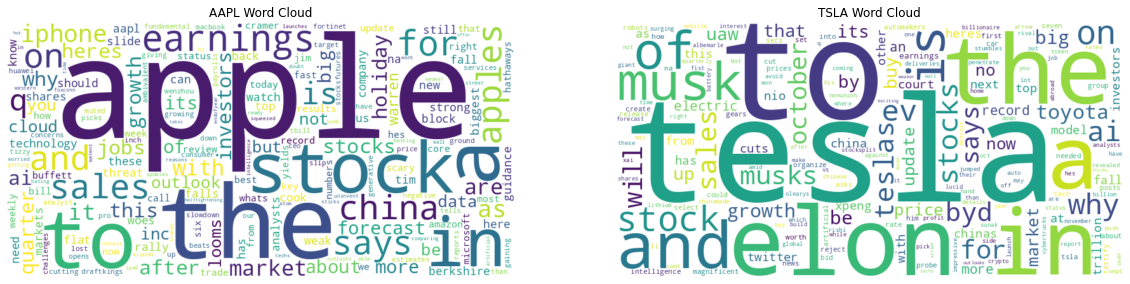

In [26]:
# Function to clean and split text into words
def clean_and_split(text):
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert text to lower case and split into words
    words = text.lower().split()
    return words

# Function to generate a word cloud from titles of a specific ticker
def generate_wordcloud_for_ticker(dataframe, ticker):
    # Filter the dataframe for the given ticker
    ticker_titles = dataframe[dataframe['ticker'] == ticker]['title'].dropna().str.cat(sep=' ')
    # Clean and split the text into words
    ticker_words = clean_and_split(ticker_titles)
    # Count the frequency of each word
    ticker_word_counts = Counter(ticker_words)
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ticker_word_counts)
    return wordcloud


# Generate word clouds for both AAPL and TSLA
wordcloud_aapl = generate_wordcloud_for_ticker(df, 'AAPL')
wordcloud_tsla = generate_wordcloud_for_ticker(df, 'TSLA')

# Display the word clouds using matplotlib
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# AAPL word cloud
axs[0].imshow(wordcloud_aapl, interpolation='bilinear')
axs[0].set_title('AAPL Word Cloud')
axs[0].axis('off')

# TSLA word cloud
axs[1].imshow(wordcloud_tsla, interpolation='bilinear')
axs[1].set_title('TSLA Word Cloud')
axs[1].axis('off')

plt.show()

## Sentiment Analysis

We are using lambda function with the VADER sentiment analysis tool from the nltk library to calculate the compound sentiment score for each title in a dataframe.
- A positive score indicates a positive sentiment.
- A negative score indicates a negative sentiment.
- A score around 0 indicates a neutral sentiment.

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
vader = SentimentIntensityAnalyzer()

In [29]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

In [30]:
df

,ticker,date,time,title,datetime,compound
0,AAPL,2023-11-05,10:02 AM,"AirPods, iPad updates weren't ready in time fo...",2023-11-05 10:02:00,-0.2755
1,AAPL,2023-11-05,10:00 AM,Big Techs Growth Status in Doubt With Weaker S...,2023-11-05 10:00:00,-0.4215
2,AAPL,2023-11-05,07:30 AM,'We won't be able to uninvent it': Warren Buff...,2023-11-05 07:30:00,0.4678
3,AAPL,2023-11-05,05:53 AM,Wall Street Is Hating on Apple Right Now. Here...,2023-11-05 05:53:00,-0.5106
4,AAPL,2023-11-05,02:58 AM,UPDATE 1-Foxconn sticks to strong end-of-year ...,2023-11-05 02:58:00,0.5106
...,...,...,...,...,...,...
201,TSLA,2023-11-01,06:44 AM,Two Tesla Rivals Report Record Sales After War...,2023-11-01 06:44:00,-0.0534
202,TSLA,2023-11-01,06:15 AM,Tesla's True Cost of Ownership Revealed: Disas...,2023-11-01 06:15:00,0.4215
203,TSLA,2023-11-01,05:55 AM,Mega-cap firm valuations fall amid rising rate...,2023-11-01 05:55:00,0.0000
204,TSLA,2023-11-01,05:44 AM,2 Magnificent Stocks to Build Wealth for Retir...,2023-11-01 05:44:00,0.7964


Calculate the mean compound score for each day:

In [31]:
mean_df = df.groupby(['ticker', 'date'])['compound'].mean().reset_index()

In [32]:
mean_df

,ticker,date,compound
0,AAPL,2023-11-02,0.076475
1,AAPL,2023-11-03,0.026188
2,AAPL,2023-11-04,0.038731
3,AAPL,2023-11-05,-0.032743
4,TSLA,2023-11-01,0.116382
5,TSLA,2023-11-02,0.053357
6,TSLA,2023-11-03,0.036628
7,TSLA,2023-11-04,-0.001678
8,TSLA,2023-11-05,0.290950


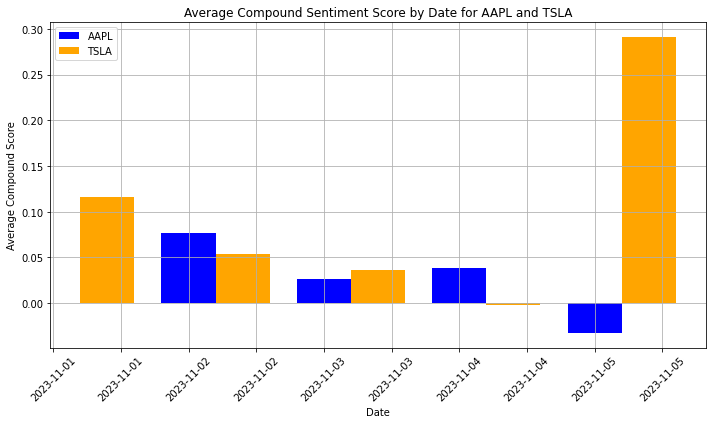

In [33]:


plt.figure(figsize=(10, 6))

# Create a bar plot for AAPL
plt.bar(mean_df[mean_df['ticker'] == 'AAPL']['date'],
        mean_df[mean_df['ticker'] == 'AAPL']['compound'],
        width=0.4, label='AAPL', color='blue')

# Create a bar plot for TSLA, offset by 0.4 days for clarity
plt.bar(mean_df[mean_df['ticker'] == 'TSLA']['date'] + pd.Timedelta(days=0.4),
        mean_df[mean_df['ticker'] == 'TSLA']['compound'],
        width=0.4, label='TSLA', color='orange')

# Formatting the date labels to show the year, month, and day
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Adding the axis labels and title
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.title('Average Compound Sentiment Score by Date for AAPL and TSLA')

# Adding a grid and a legend
plt.grid(True)
plt.legend()

# Show the plot with clear date labels including the year
plt.tight_layout()
plt.show()


## Correlational Analysis

Getting the numerical values for these stocks for more analysis

In [35]:
# Define the start and end date for the historical data
start_date = '2023-01-01'
end_date = '2023-11-05'

# Download the stock price data
df_stock = yf.download(tickers, start=start_date, end=end_date)

# Display the first few rows of the data
print(df_stock.head())

[*********************100%%**********************]  2 of 2 completed
             Adj Close                   Close                    High  \
                  AAPL        TSLA        AAPL        TSLA        AAPL   
Date                                                                     
2023-01-03  124.538658  108.099998  125.070000  108.099998  130.899994   
2023-01-04  125.823189  113.639999  126.360001  113.639999  128.660004   
2023-01-05  124.488869  110.339996  125.019997  110.339996  127.769997   
2023-01-06  129.069336  113.059998  129.619995  113.059998  130.289993   
2023-01-09  129.597076  119.769997  130.149994  119.769997  133.410004   

                               Low                    Open              \
                  TSLA        AAPL        TSLA        AAPL        TSLA   
Date                                                                     
2023-01-03  118.800003  124.169998  104.639999  130.279999  118.470001   
2023-01-04  114.589996  125.080002  107.51

In [39]:
# Select the 'Adj Close' prices for both AAPL and TSLA
adj_close_df = df_stock['Adj Close'].reset_index()
adj_close_df.columns = ['date', 'AAPL', 'TSLA']  # Rename the columns appropriately


In [40]:
# Merge the sentiment data with the adjusted close prices
merged_df = pd.merge(mean_df, adj_close_df, on='date', how='inner')


In [43]:
merged_df

,ticker,date,compound,AAPL,TSLA
0,AAPL,2023-11-02,0.076475,177.570007,218.509995
1,TSLA,2023-11-02,0.053357,177.570007,218.509995
2,AAPL,2023-11-03,0.026188,176.649994,219.960007
3,TSLA,2023-11-03,0.036628,176.649994,219.960007
4,TSLA,2023-11-01,0.116382,173.970001,205.660004


In [44]:
# Calculate correlation for AAPL
aapl_merged_df = merged_df[merged_df['ticker'] == 'AAPL']
aapl_corr = aapl_merged_df['compound'].corr(aapl_merged_df['AAPL'])

# Calculate correlation for TSLA
tsla_merged_df = merged_df[merged_df['ticker'] == 'TSLA']
tsla_corr = tsla_merged_df['compound'].corr(tsla_merged_df['TSLA'])

print(f"AAPL Sentiment/Price Correlation: {aapl_corr}")
print(f"TSLA Sentiment/Price Correlation: {tsla_corr}")


AAPL Sentiment/Price Correlation: 1.0
TSLA Sentiment/Price Correlation: -0.9941752892098253


The numbers close to 1 or -1 is unusual. It is due to insufficient available data, we will try again when we have more data.